In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("employees.csv")
df.shape

(1000, 8)

### Data cleaning and formating

In [24]:
#Find NAN values in data and dropping them
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head(10))

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
10,Louise,Female,8/12/1980,9:01 AM,63241,15.132,True,NaN
20,Lois,NaN,4/22/1995,7:18 PM,64714,4.934,True,Legal
22,Joshua,NaN,3/8/2012,1:58 AM,90816,18.816,True,Client Services
23,NaN,Male,6/14/2012,4:19 PM,125792,5.042,NaN,NaN
25,NaN,Male,10/8/2012,1:12 AM,37076,18.576,NaN,Client Services
27,Scott,NaN,7/11/1991,6:58 PM,122367,5.218,False,Legal
31,Joyce,NaN,2/20/2005,2:40 PM,88657,12.752,False,Product
32,NaN,Male,8/21/1998,2:27 PM,122340,6.417,NaN,NaN


In [25]:
#dropping NAN values
df = df.dropna(axis= 'index', how="any")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         764 non-null    object 
 1   Gender             764 non-null    object 
 2   Start Date         764 non-null    object 
 3   Last Login Time    764 non-null    object 
 4   Salary             764 non-null    int64  
 5   Bonus %            764 non-null    float64
 6   Senior Management  764 non-null    object 
 7   Team               764 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 53.7+ KB


### Data exploration

In [27]:
#Number Of people working in each department
num_of_people = df.groupby(["Team"]).count()["First Name"]
print(num_of_people)

Team
Business Development    88
Client Services         85
Distribution            60
Engineering             79
Finance                 80
Human Resources         76
Legal                   67
Marketing               74
Product                 83
Sales                   72
Name: First Name, dtype: int64


In [28]:
#lets start by finding the number of deparments in the company
df["Team"].value_counts().count(

SyntaxError: unexpected EOF while parsing (<ipython-input-28-e374725819e3>, line 2)

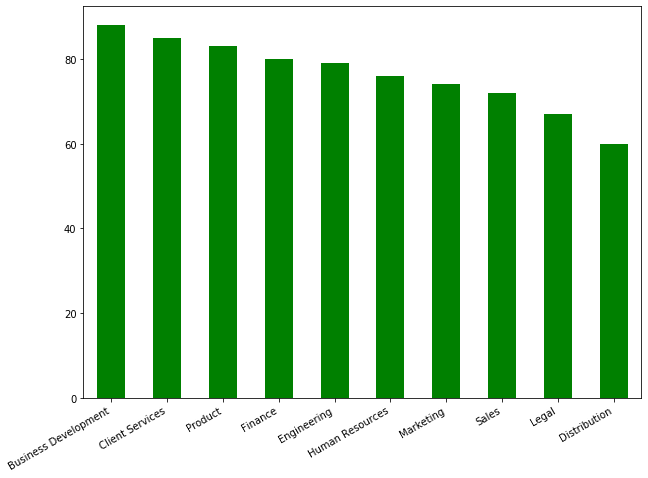

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
df["Team"].value_counts().plot.bar(color="green")
plt.gcf().autofmt_xdate()

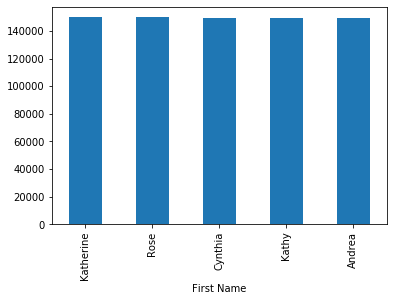

In [30]:
#who are top 5 highest paid employees in the company
most_earning = df.groupby(["First Name"])["Salary"].max().sort_values(ascending=False).nlargest(5)
most_earning.plot.bar()

In [31]:
#which team are they at in the company

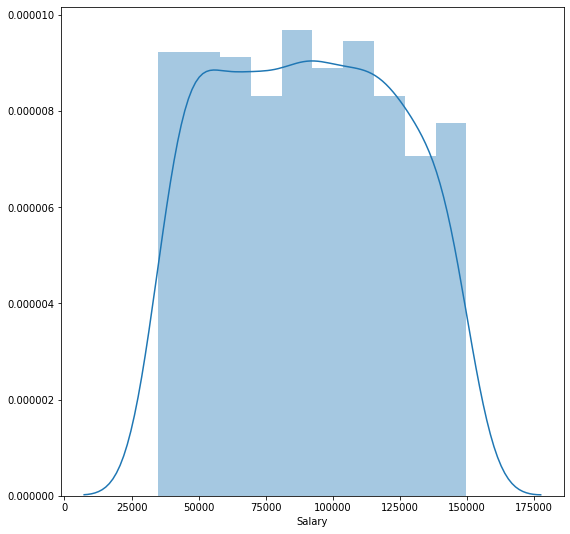

In [32]:
#checking the salary distribution among the numbers in the company
import seaborn as sns
plt.figure(figsize=(9,9))
sns.distplot( df['Salary'])
plt.show()

In [33]:
# who are the newest and oldest among the employees 
#extracting the years from "Start date" column and create a new column
df["year"] = pd.to_datetime(df["Start Date"]).dt.year

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         764 non-null    object 
 1   Gender             764 non-null    object 
 2   Start Date         764 non-null    object 
 3   Last Login Time    764 non-null    object 
 4   Salary             764 non-null    int64  
 5   Bonus %            764 non-null    float64
 6   Senior Management  764 non-null    object 
 7   Team               764 non-null    object 
 8   year               764 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 59.7+ KB


In [35]:
#To analyze how many employee the company hired by year
years = df.groupby(["year"]).agg({"First Name" : 'count'})
years.reset_index()
years.sort_values("First Name")

,First Name
year,
2016,7
1985,12
1987,13
1983,14
1989,14
1993,15
1991,15
1990,15
1998,16


Text(0.5, 0, 'hired by years')

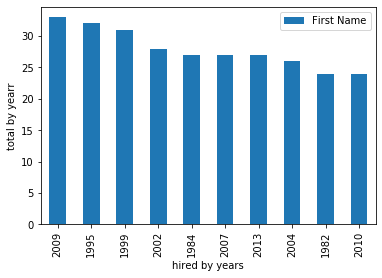

In [39]:
#analyzing hired number of employees by year
#seeing the years which company hired most of employess
ten = years.nlargest(10, "First Name").plot(kind="bar")
plt.ylabel('total by yearr')
plt.xlabel('hired by years')

Text(0.5, 1.0, 'Total Salary Comparison by Gender')

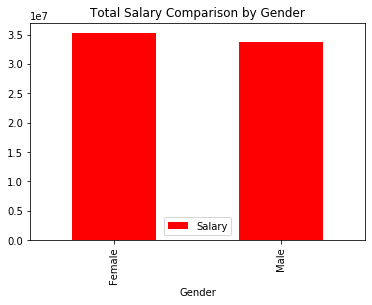

In [42]:
df.groupby(["Gender"]).agg({"Salary":"sum"}).plot(kind="bar", color=["red", "black"])
plt.title("Total Salary Comparison by Gender")
#as a rresult, the total of female employees are higher than males

### Filtering practices

In [44]:
#employess who is making less than $45K, male and joined the company after 2000s
mask = df["Salary"] < 45000
mask2 = df["Gender"] == "Male"
mask3= df["year"] > 2000
df[mask & mask2 & mask3]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,year
63,Matthew,Male,1/2/2013,10:33 PM,35203,18.040,False,Human Resources,2013
119,Paul,Male,6/3/2008,3:05 PM,41054,12.299,False,Marketing,2008
322,Douglas,Male,1/8/2002,6:42 PM,41428,14.372,False,Product,2002
461,Jeremy,Male,8/9/2001,3:56 AM,43354,13.946,False,Marketing,2001
486,Howard,Male,4/9/2012,6:36 AM,37984,2.021,False,Distribution,2012
493,Craig,Male,11/1/2005,11:31 PM,44857,13.266,False,Finance,2005
501,Sean,Male,2/11/2013,7:07 PM,42748,9.765,False,Distribution,2013
519,Raymond,Male,2/16/2009,10:38 PM,37812,3.178,False,Human Resources,2009
610,Alan,Male,2/17/2012,12:26 AM,41453,10.084,False,Product,2012
762,Terry,Male,11/10/2004,4:33 AM,35633,3.947,True,Distribution,2004
